Adapted from the homeworks with the simple logistic model from the Deep Learning Toar Sheni class last year with Dr. Elishai Ezra Tzur. We will now add one hidden layer with 3 nodes and see how that changes things.

In [ ]:
#Dina Pinchuck 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

### sigmoid(z)

Here we define our activation function; the sigmoid function 

s = $g(\theta^{T}x)$

$z = \theta^{T}x$

$g(z) = \frac{1}{1+e^{(-z)}}$

X := data set

$\theta$ := vector of weights

Compute the sigmoid of z (A scalar or numpy array of any size) returns s

Verify: sigmoid([0, 2]) = [ 0.5, 0.88079708]

In [ ]:
def sigmoid(z): #sigmoid acitvation function
  X = np.exp(z)
  return X/(1+X)

In [ ]:
def relu(z): # relu acitvation function 
  return np.maximum(0,z) #returns np array - for each value in z if its negative it becomes zero else it stays the same
#tanh from numpy is used so there is no need to implment it 

Some examples of using this function. Notice that we can give it an array of values (not critical for us)

In [ ]:
print(sigmoid([0,2]))
print(sigmoid(2))
print(sigmoid(np.array([4])))


[0.5        0.88079708]
0.8807970779778824
[0.98201379]


### initialize_with_random: w, b
We don't use inialize with zero as zero values can be bad as we discussed in class.
Instead we inialize with random numbers.

In [ ]:
""" Initialize w and b for the both layers according to the number of the features and number of neurons in the layers.
W should be initialized randomly to small values (otherwise, values at the activation functions could be at the flat part).
"""
def initialize_parameters (n_x, n_h,n_h2, n_y):
    # W1 -> W3-> W2
    return {
    "W1":np.random.randn(n_h,n_x) * 0.01,
    "b1":np.zeros([n_h, 1]),
    #output
    "W2":np.random.randn(n_y,n_h2) * 0.01,
    "b2":np.zeros([n_y, 1]),
    #second hidden layer 
    "W3": np.random.randn(n_h2,n_h)*0.1,
    "b3":np.zeros([n_h2,1]),
}

In [ ]:
# Toy example
print(initialize_parameters(4,3,2,1))

{'W1': array([[ 0.0149626 , -0.00910521,  0.01306729, -0.00523379],
       [-0.00657768, -0.0022079 ,  0.00606395,  0.00921449],
       [ 0.00629703, -0.01756015, -0.00143725, -0.01296905]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[-0.00514712,  0.00145949]]), 'b2': array([[0.]]), 'W3': array([[-0.03822021, -0.06238835, -0.03842413],
       [ 0.0445419 ,  0.0604948 , -0.01780553]]), 'b3': array([[0.],
       [0.]])}


### forward propagate(X, thetas): 
retuns: A2 (the final value) and the cache of values
Implement the forward propagation
* parameters -- python dictionary containing your parameters (output of initialization function)
Note that thetas is now a cache of thetas (weights) 
* A2 -- The sigmoid output of the second activation
* cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"

In [ ]:
#func - activation function for first hidden layer, func2- activation function for second hidden layer
def forward_propagation(X, parameters,func,func2): 
    #Z1 -> Z3 -> Z2
    #Hidden Layer 1
    Z1 = parameters["W1"].dot(X)+parameters["b1"]
    A1 = func(Z1)
    #hidden layer 2
    Z3=parameters["W3"].dot(A1)+parameters["b3"]
    A3=func2(Z3)
    #Output Layer
    Z2 = parameters["W2"].dot(A3)+parameters["b2"]
    A2 = sigmoid(Z2)
    #print(A2)
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2,
        "A3":A3,
        "Z3":Z3
    }
    return A2, cache


Back_propagation calcuates the weight updates using the derivative of the different activation functions. These equations are similar to those in the lecture.

In [ ]:
#dervative functions
def tanh_der(X): # tanh derative
    return 1-X**2 # returns np array- the derative of each value in X is 1 - x^2

In [ ]:
def sigmoid_der(X): #sigmoid derative
  return sigmoid(X)*(1-sigmoid(X)) # returns np array- the derative of each value in X is sigmoid(x)*(1-sigmoid(x))

In [ ]:
def relu_der(X): # relu derative
  return 1 * (X > 0) #returns np array - for each value in X if it is bigger than zero than the deriative is one else the derative is 0

In [ ]:
#der_function is the derivative for the first hidden layer, der_function2 is the derivative function for the second hidden layer
def backward_propagation(parameters, cache, X, Y,der_function,der_function2):
    #Z2 -> Z3 -> Z1 
    m = X.shape[1] # Number of samples
    #Output Layer
    dZ2 = cache["A2"] - Y #for the sigmoid layer
    dW2 = (1 / m) * dZ2.dot(cache["A3"].T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    #Hidden layer 2
    dA3 = np.dot(parameters['W2'].T, dZ2)
    dZ3 =  dA3 * der_function2(cache['A3'])  
    dW3 = (1 / m) * np.dot(dZ3, cache["A1"].T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    #Hidden Layer 1
    dA1 = np.dot(parameters['W3'].T, dZ3)
    dZ1 =  dA1 * der_function(cache['A1'])  
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1":dW1,"dW2":dW2,"db1":db1,"db2":db2,"dW3":dW3,"db3":db3}


The cost function from the last example.

In [ ]:
def cost_calculation(A,Y):
    cost = np.mean(-(Y*np.log(A) + (1-Y)*np.log(1-(A))))
    return cost

Update the weights in the dictionary cache.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    return {
    "W1": parameters["W1"] - learning_rate*grads["dW1"],
    "W2": parameters["W2"] - learning_rate*grads["dW2"],
    "b1": parameters["b1"] - learning_rate*grads["db1"],
    "b2": parameters["b2"] - learning_rate*grads["db2"],
    "W3": parameters["W3"] - learning_rate*grads["dW3"],
    "b3": parameters["b3"] - learning_rate*grads["db3"],
}

### nn_model(X, Y, num_iterations, learning_rate): d
Builds the logistic regression model by calling the functions implemented above
* X_train -- training set represented by a numpy array of shape (number of features, m_train)
* Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
* X_test -- test set represented by a numpy array of shape (number of features, m_test)
* Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
* num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
* learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
* d -- dictionary containing information about the model. 

In [ ]:
#receives activation and derivative functions for both hidden layers, the number of nodes in the first layer and the number of nodes in the second hidden layer
def nn_model(X, Y, iterations,lr,ac_func1,ac_func2,der_func1,der_func2,costs,nodes,nodes2): 
    n_x=X.shape[0]
    n_h=nodes  
    n_y=1
    parameters = initialize_parameters(n_x,n_h,nodes2,n_y)
    #print("Network shape " , X.shape[0], n_h , n_y)
    for i in range(iterations):
        A2, cache = forward_propagation(X,parameters,ac_func1,ac_func2)
        cost = cost_calculation(A2,Y)
        grads = backward_propagation(parameters,cache,X,Y,der_func1,der_func2)
        parameters = update_parameters(parameters,grads,lr)
        costs.append(cost)
        #cost check
        #if i % 100 == 0:
            #print (f"Cost after iteration {i}: {cost}")
    return parameters, costs

### predict(X, parameters): Y_prediction

In [ ]:
def predict(X, parameters,func1,func2):
    A2, cache = forward_propagation(X, parameters,func1,func2)
    return np.rint(A2)
    '''This round the values like:
    def predict(X, theta, threshold=0.5):
    if predict_probs(X, theta) >= threshold:
        return 1
        print(A)'''

def prediction_accuracy(y_pred,y_true):
    return np.mean(y_pred==y_true)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://github.com/rosenfa/nn/blob/master/pima-indians-diabetes.csv?raw=true'
#url = 'https://github.com/rosenfa/nn/blob/master/class2/spam.csv?raw=true'
df=pd.read_csv(url,  header=0, error_bad_lines=False) 
features = df.drop(['Outcome'], axis = 1 )
features = ((features - features.mean())/features.std())
X = np.array(features)
Y = np.array(df['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()     
sk_model.fit(X_train, Y_train)  
accuracy = sk_model.score(X_test, Y_test)
print("accuracy = ", accuracy * 100, "%")
#print(Y_train)

accuracy =  80.20833333333334 %


In [ ]:
X_train, X_test = X_train.T, X_test.T

In [ ]:
def set_up(activate,derivative,ac,der,hidden_layer2_size,alpha=1,graphs=True):
  der_check={sigmoid:sigmoid_der,np.tanh:tanh_der,relu:relu_der} # dictonary - keys are activation functions and values are the corresponding derivative functions
  if derivative!=der_check[activate] or der!=der_check[ac]:
    print("activation and derivative functions are not compatible")
    return {},{}
  num_iterations=[500,1000,1500,2000] #number of iterations  
  train_acc_dict={}
  test_acc_dict={}
  for iter in num_iterations:
    #accuracy lists used for plotting each graph
    train_acc_list=[] 
    test_acc_list=[]
    for i in range(1,7): # each graph shows the accuarcy with 1,2,3,4,5, or 6 nodes
      costs = []
      parameters, costs = nn_model(X_train, Y_train,iter,alpha,activate,ac,derivative,der,costs,i,hidden_layer2_size)
      Y_train_predict = predict(X_train, parameters,activate,ac)
      train_acc = prediction_accuracy(Y_train_predict,Y_train)
      Y_test_predict = predict(X_test, parameters,activate,ac)
      test_acc = prediction_accuracy(Y_test_predict,Y_test)
      train_acc_list.append(round(train_acc,4))
      test_acc_list.append(round(test_acc,4))
    train_acc_dict[iter]= train_acc_list
    test_acc_dict[iter]=test_acc_list
    if graphs:
      #plotting the graph after the accuracy for each node amount is found, per num_iterations
      plt.plot(train_acc_list,label="train accuracy",color='#013056')
      plt.plot(test_acc_list,label="test accuracy",color='#00c4c9' )
      #each list has 6 accuracy values - that go from 0-5 instead of 1-6 - the next 3 lines fix this for the x axis label
      l=[0,1,2,3,4,5]
      x_ticks=[1,2,3,4,5,6]
      plt.xticks(l,x_ticks)
      #adds labels to the axes
      plt.xlabel("Number of Nodes")
      plt.ylabel("Accuracy")
      plt.legend() #shows the box on the graph that has the line name and color
      plt.title(label=activate.__name__ + " -> " +ac.__name__ +" " + str(iter) +" iterations") # graph title
      plt.show() # "saves" graph in current state so at the end of the next loop a new graph will be shown on a new plot
  return train_acc_dict,test_acc_dict


Tanh had the best testing results for the learning rates that I used(based on the best accuarcy in each data frame) , so I kept the first layer tanh and changed the second layer. 
Adding the second layer didnt really improve the accuracies 

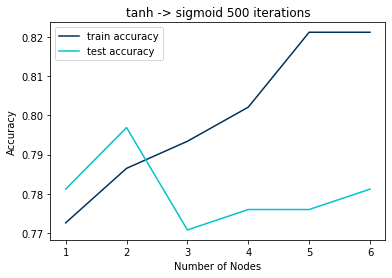

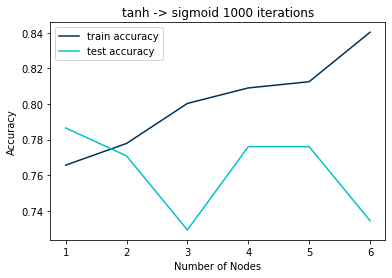

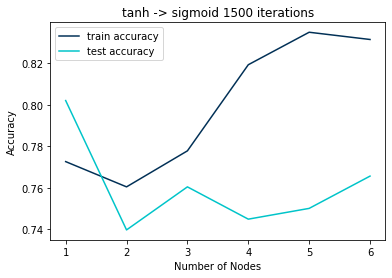

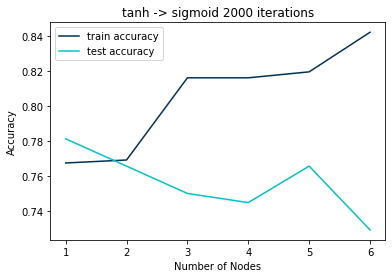

tanh sigmoid training accuracy data frame
     500     1000    1500    2000
1  0.7726  0.7656  0.7726  0.7674
2  0.7865  0.7778  0.7604  0.7691
3  0.7934  0.8003  0.7778  0.8160
4  0.8021  0.8090  0.8194  0.8160
5  0.8212  0.8125  0.8351  0.8194
6  0.8212  0.8403  0.8316  0.8420

tanh sigmoid testing accuracy data frame
     500     1000    1500    2000
1  0.7812  0.7865  0.8021  0.7812
2  0.7969  0.7708  0.7396  0.7656
3  0.7708  0.7292  0.7604  0.7500
4  0.7760  0.7760  0.7448  0.7448
5  0.7760  0.7760  0.7500  0.7656
6  0.7812  0.7344  0.7656  0.7292


In [ ]:
tanh_s_train_acc,tanh_s_test_acc=set_up(np.tanh,tanh_der,sigmoid,sigmoid_der,6)
tanh_s_train_df = pd.DataFrame(tanh_s_train_acc)
tanh_s_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual dataframe and not a copy
print("tanh sigmoid training accuracy data frame")
print(tanh_s_train_df)

tanh_s_test_df = pd.DataFrame(tanh_s_test_acc)
tanh_s_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
print("")
print("tanh sigmoid testing accuracy data frame")
print(tanh_s_test_df)

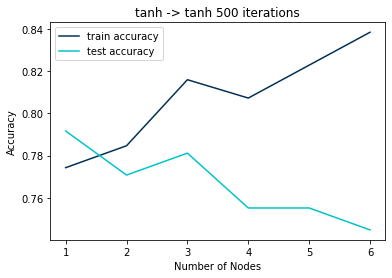

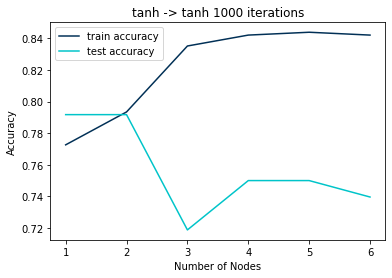

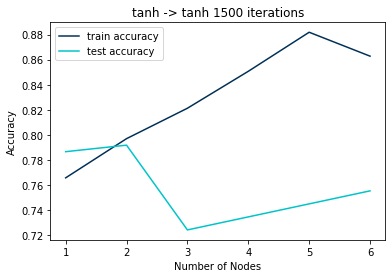

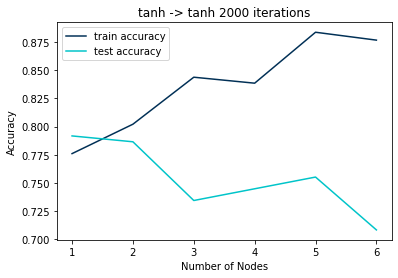

tanh tanh training accuracy data frame
     500     1000    1500    2000
1  0.7743  0.7726  0.7656  0.7760
2  0.7847  0.7934  0.7969  0.8021
3  0.8160  0.8351  0.8212  0.8438
4  0.8073  0.8420  0.8507  0.8385
5  0.8229  0.8438  0.8819  0.8837
6  0.8385  0.8420  0.8628  0.8767

tanh tanh testing accuracy data frame
     500     1000    1500    2000
1  0.7917  0.7917  0.7865  0.7917
2  0.7708  0.7917  0.7917  0.7865
3  0.7812  0.7188  0.7240  0.7344
4  0.7552  0.7500  0.7344  0.7448
5  0.7552  0.7500  0.7448  0.7552
6  0.7448  0.7396  0.7552  0.7083


In [ ]:
tanh_t_train_acc,tanh_t_test_acc=set_up(np.tanh,tanh_der,np.tanh,tanh_der,3)
tanh_t_train_df = pd.DataFrame(tanh_t_train_acc)
tanh_t_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual dataframe and not a copy
print("tanh tanh training accuracy data frame")
print(tanh_t_train_df)

tanh_t_test_df = pd.DataFrame(tanh_t_test_acc)
tanh_t_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
print("")
print("tanh tanh testing accuracy data frame")
print(tanh_t_test_df)

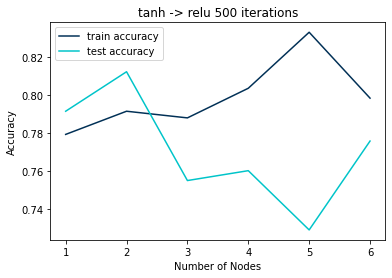

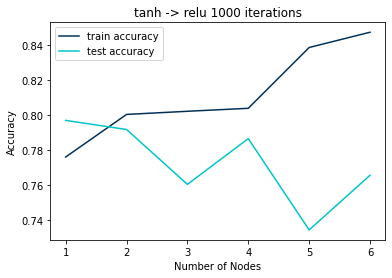

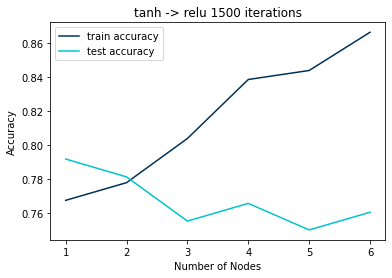

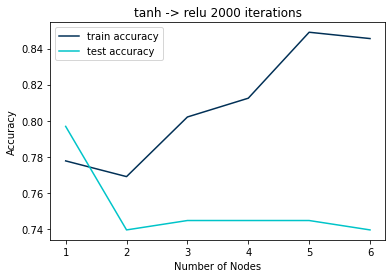

tanh relu training accuracy data frame
     500     1000    1500    2000
1  0.7795  0.7760  0.7674  0.7778
2  0.7917  0.8003  0.7778  0.7691
3  0.7882  0.8021  0.8038  0.8021
4  0.8038  0.8038  0.8385  0.8125
5  0.8333  0.8385  0.8438  0.8490
6  0.7986  0.8472  0.8663  0.8455

tanh relu testing accuracy data frame
     500     1000    1500    2000
1  0.7917  0.7969  0.7917  0.7969
2  0.8125  0.7917  0.7812  0.7396
3  0.7552  0.7604  0.7552  0.7448
4  0.7604  0.7865  0.7656  0.7448
5  0.7292  0.7344  0.7500  0.7448
6  0.7760  0.7656  0.7604  0.7396


In [ ]:
tanh_r_train_acc,tanh_r_test_acc=set_up(np.tanh,tanh_der,relu,relu_der,4)
tanh_r_train_df = pd.DataFrame(tanh_r_train_acc)
tanh_r_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual dataframe and not a copy
print("tanh relu training accuracy data frame")
print(tanh_r_train_df)

tanh_r_test_df = pd.DataFrame(tanh_r_test_acc)
tanh_r_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
print("")
print("tanh relu testing accuracy data frame")
print(tanh_r_test_df)